In [3]:
# Run some setup code for this notebook.
from __future__ import print_function

import random
import numpy as np
from utils import *
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Loading and Preprocessing

In [2]:
# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_pub_test, y_pub_test
   del X_pri_test, y_pri_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_pub_test, y_pub_test, X_pri_test, y_pri_test = load_data()

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Public test data shape: ', X_pub_test.shape)
print('Public test labels shape: ', y_pub_test.shape)
print('Private test data shape: ', X_pri_test.shape)
print('Private test labels shape: ', y_pri_test.shape)

Training data shape:  (28709, 48, 48, 1)
Training labels shape:  (28709,)
Public test data shape:  (3589, 48, 48, 1)
Public test labels shape:  (3589,)
Private test data shape:  (3589, 48, 48, 1)
Private test labels shape:  (3589,)


In [4]:
# Split the data into train, val, and test sets. In addition we will
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 25709
num_validation = 3000
num_test = 1000
num_dev = 500

# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_pub_test = X_pub_test[mask]
y_pub_test = y_pub_test[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_pri_test = X_pri_test[mask]
y_pri_test = y_pri_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Public test data shape: ', X_pub_test.shape)
print('Public test labels shape: ', y_pub_test.shape)
print('Private test data shape: ', X_pri_test.shape)
print('Private test labels shape: ', y_pri_test.shape)

Train data shape:  (25709, 48, 48, 1)
Train labels shape:  (25709,)
Validation data shape:  (3000, 48, 48, 1)
Validation labels shape:  (3000,)
Public test data shape:  (1000, 48, 48, 1)
Public test labels shape:  (1000,)
Private test data shape:  (1000, 48, 48, 1)
Private test labels shape:  (1000,)


In [5]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_pub_test = np.reshape(X_pub_test, (X_pub_test.shape[0], -1))
X_pri_test = np.reshape(X_pri_test, (X_pri_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))

# As a sanity check, print out the shapes of the data
print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Public test data shape: ', X_pub_test.shape)
print('Private test data shape: ', X_pri_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (25709, 2304)
Validation data shape:  (3000, 2304)
Public test data shape:  (1000, 2304)
Private test data shape:  (1000, 2304)
dev data shape:  (500, 2304)


[120.10793885 117.08226691 114.05465012 111.63930919 109.4107511
 107.67692248 106.86533899 106.76253452 107.40686141 109.00902408]


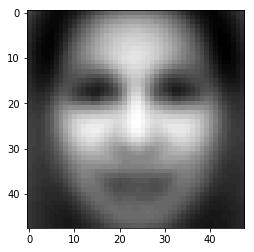

In [6]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((48, 48)).astype('uint8')) # visualize the mean image
plt.show()

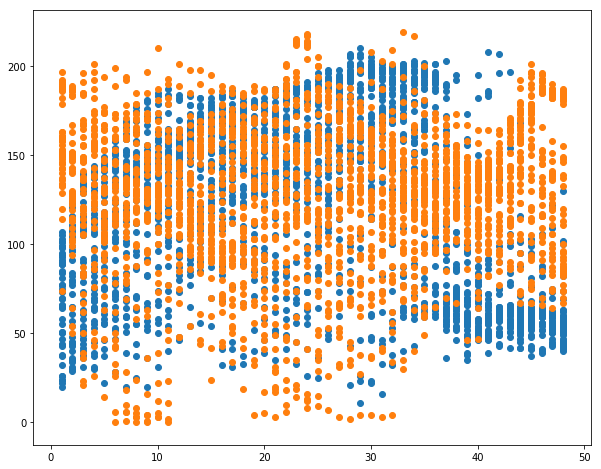

In [7]:
#Plot an image as scatter plot before subtracting the mean image
for i in range(2):
    b = np.array([j+1 for j in range(48)])
    x = np.repeat(b,X_train[i].reshape((48, 48)).astype('uint8').shape[0])
    # now reshape the a matrix to generate a vector
    y = np.reshape(X_train[i].reshape((48, 48)).astype('uint8').T,(1,np.product(X_train[i].reshape((48, 48)).astype('uint8').shape) ))
    plt.scatter(x,y)
plt.show()

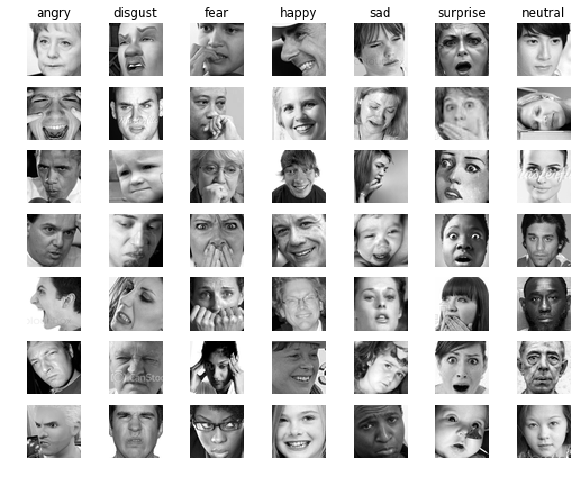

In [8]:
#Plot images before subtracting the mean image
classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
num_classes = len(classes)
samples_per_class = 7
temp = {}
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    temp[y] = idxs
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].reshape((48, 48)).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [9]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_pub_test -= mean_image
X_pri_test -= mean_image
X_dev -= mean_image
# X_train /= np.std(X_train, axis = 0)
# X_val /= np.std(X_val, axis = 0)
# X_pub_test /= np.std(X_pub_test, axis = 0)
# X_pri_test /= np.std(X_pri_test, axis = 0)
# X_dev /= np.std(X_dev, axis = 0)

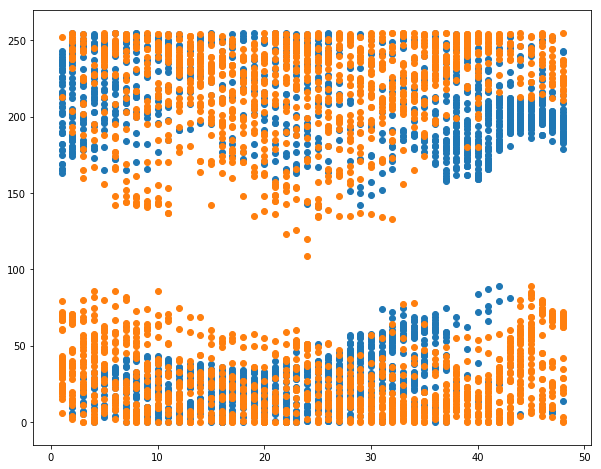

In [10]:
#Plot an image as scatter plot after subtracting the mean_image
for i in range(2):
    b = np.array([j+1 for j in range(48)])
    x = np.repeat(b,X_train[i].reshape((48, 48)).astype('uint8').shape[0])
    # now reshape the a matrix to generate a vector
    y = np.reshape(X_train[i].reshape((48, 48)).astype('uint8').T,(1,np.product(X_train[i].reshape((48, 48)).astype('uint8').shape) ))
    plt.scatter(x,y)
plt.show()

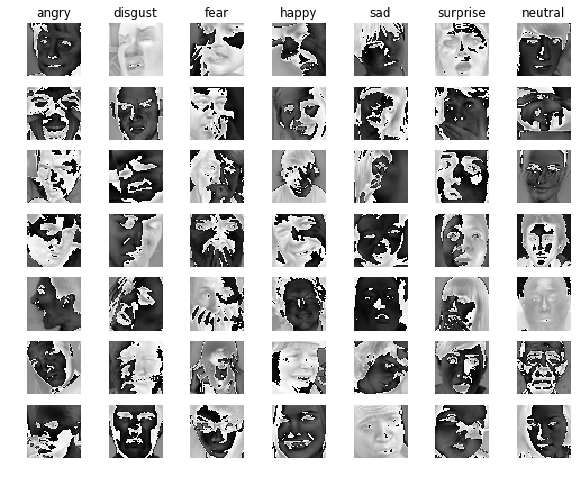

In [11]:
#Plot severalimages after subtracting the mean_image
classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
for ids in temp:
    for i, idx in enumerate(temp[ids]):
           plt_idx = i * num_classes + ids + 1
           plt.subplot(samples_per_class, num_classes, plt_idx)
           plt.imshow(X_train[idx].reshape((48, 48)).astype('uint8'))
           plt.axis('off')
           if i == 0:
               plt.title(classes[ids])
plt.show()

In [12]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_pub_test = np.hstack([X_pub_test, np.ones((X_pub_test.shape[0], 1))])
X_pri_test = np.hstack([X_pri_test, np.ones((X_pri_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])


print(X_train.shape, X_val.shape, X_pub_test.shape, X_pri_test.shape, X_dev.shape)

(25709, 2305) (3000, 2305) (1000, 2305) (1000, 2305) (500, 2305)


SVM Classifier

In [13]:
# Evaluate the naive implementation of the loss we provided for you:
from classifiers.linear_svm import *
import time

# generate a random SVM weight matrix of small numbers
W = np.random.randn(2305, 7) * 0.0001 

loss, grad = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 5.780322


In [14]:
# Once you've implemented the gradient, recompute it with the code below
# and gradient check it with the function we provided for you

# Compute the loss and its gradient at W.
loss, grad = svm_loss_vectorized(W, X_dev, y_dev, 0.0)

# Numerically compute the gradient along several randomly chosen dimensions, and
# compare them with your analytically computed gradient. The numbers should match
# almost exactly along all dimensions.
from gradient_check import grad_check_sparse
f = lambda w: svm_loss_vectorized(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

# do the gradient check once again with regularization turned on
# you didn't forget the regularization gradient did you?
loss, grad = svm_loss_vectorized(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_vectorized(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -5.138634 analytic: -5.138634, relative error: 7.440039e-13
numerical: -2.144621 analytic: -2.144621, relative error: 1.486315e-11
numerical: 1.692929 analytic: 1.692929, relative error: 1.295035e-11
numerical: -1.898240 analytic: -1.898240, relative error: 9.644501e-13
numerical: 9.909685 analytic: 9.909685, relative error: 4.514348e-12
numerical: 0.478289 analytic: 0.478289, relative error: 3.022357e-11
numerical: -10.855070 analytic: -10.855070, relative error: 2.859744e-12
numerical: -4.860656 analytic: -4.860656, relative error: 3.978082e-12
numerical: -2.366255 analytic: -2.366255, relative error: 3.810104e-12
numerical: -1.070232 analytic: -1.070232, relative error: 9.746271e-12
numerical: -14.076761 analytic: -14.076761, relative error: 1.866361e-12
numerical: -8.140050 analytic: -8.140050, relative error: 2.006791e-12
numerical: -5.713643 analytic: -5.713643, relative error: 8.414671e-12
numerical: 6.593664 analytic: 6.593664, relative error: 3.158084e-13
numerical:

In [15]:
# Next implement the function svm_loss_vectorized; for now only compute the loss;
# we will implement the gradient in a moment.
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


# The losses should match but your vectorized implementation should be much faster.
print('difference: %f' % (loss_naive - loss_vectorized))

Naive loss: 5.780322e+00 computed in 0.130822s
Vectorized loss: 5.780322e+00 computed in 0.001764s
difference: 0.000000


In [16]:
# Complete the implementation of svm_loss_vectorized, and compute the gradient
# of the loss function in a vectorized way.

# The naive implementation and the vectorized implementation should match, but
# the vectorized version should still be much faster.
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

# The loss is a single number, so it is easy to compare the values computed
# by the two implementations. The gradient on the other hand is a matrix, so
# we use the Frobenius norm to compare them.
difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.077411s
Vectorized loss and gradient: computed in 0.001915s
difference: 0.000000


# Stochastic Gradient Descent


In [17]:
# In the file linear_classifier.py, implement SGD in the function
# LinearClassifier.train() and then run it with the code below.
from classifiers.linear_classifier import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 411.761783
iteration 100 / 1500: loss 151.499994
iteration 200 / 1500: loss 58.095934
iteration 300 / 1500: loss 24.058591
iteration 400 / 1500: loss 11.966685
iteration 500 / 1500: loss 7.584384
iteration 600 / 1500: loss 5.959577
iteration 700 / 1500: loss 5.116130
iteration 800 / 1500: loss 4.816384
iteration 900 / 1500: loss 4.950436
iteration 1000 / 1500: loss 5.404927
iteration 1100 / 1500: loss 4.995570
iteration 1200 / 1500: loss 4.787159
iteration 1300 / 1500: loss 4.977985
iteration 1400 / 1500: loss 4.916832
That took 2.861574s


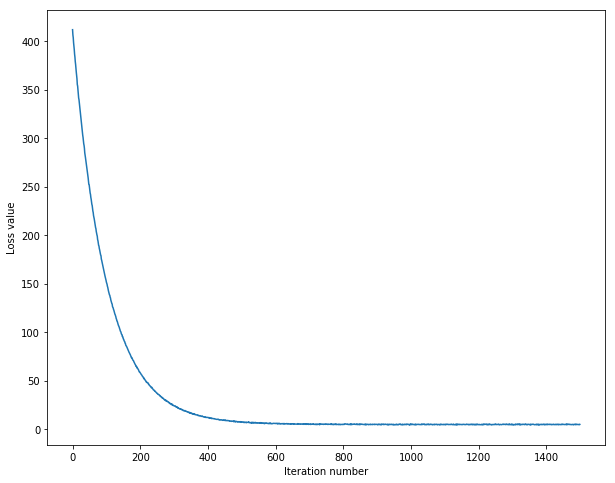

In [18]:
# A useful debugging strategy is to plot the loss as a function of
# iteration number:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [19]:
# Write the LinearSVM.predict function and evaluate the performance on both the
# training and validation set
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.324828
validation accuracy: 0.328667


In [20]:
from random import uniform
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.
# learning_rates = [1e-8, 1e-7, 2e-7, 5e-5]
# regularization_strengths = [1e4, 2e4, 2.5e4, 3e4, 4e4, 5e4]
# learning_rates = [1e-7]
# regularization_strengths = [2e4]
# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1   # The highest validation accuracy that we have seen so far.
best_svm = None # The LinearSVM object that achieved the highest validation rate.

################################################################################
# TODO:                                                                        #
# Write code that chooses the best hyperparameters by tuning on the validation #
# set. For each combination of hyperparameters, train a linear SVM on the      #
# training set, compute its accuracy on the training and validation sets, and  #
# store these numbers in the results dictionary. In addition, store the best   #
# validation accuracy in best_val and the LinearSVM object that achieves this  #
# accuracy in best_svm.                                                        #
#                                                                              #
# Hint: You should use a small value for num_iters as you develop your         #
# validation code so that the SVMs don't take much time to train; once you are #
# confident that your validation code works, you should rerun the validation   #
# code with a larger value for num_iters.                                      #
################################################################################
# Your code
#For each learning_rates and regularization_strengths
max_count = 100
for count in range(max_count):
        #print("(", count, "/", max_count, ")")
        reg = 10**uniform(-5, -1)
        lr = 10**uniform(-3, -6)
        #print("reg:", reg, "lr:", lr)
        #Create a LinearSVM object
        new_svm = LinearSVM()
        #Train the X-train, y_train
        new_loss_hist = new_svm.train(X_train, y_train, lr, reg, num_iters= 1500, verbose=False)
        #Calculate prediction on X_train
        new_y_train_pred = new_svm.predict(X_train)
        #Calculate accuracy on prediction on X_train
        train_acc = np.mean(y_train == new_y_train_pred)
        #Calculate prediction on X_val
        new_y_val_pred = new_svm.predict(X_val)
        #Calculate accuracy on prediction on X_val
        val_acc = np.mean(y_val == new_y_val_pred)
        #Store in results
        results[(lr, reg)] = (train_acc, val_acc)
        #Display the best accuracy
        if(val_acc > best_val):
            best_val = val_acc
            best_svm = new_svm
        #print("acc:", val_acc)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.007273e-06 reg 5.999964e-05 train accuracy: 0.346844 val accuracy: 0.326667
lr 1.010504e-06 reg 8.379589e-04 train accuracy: 0.344899 val accuracy: 0.318667
lr 1.074386e-06 reg 3.675451e-03 train accuracy: 0.345521 val accuracy: 0.308000
lr 1.096828e-06 reg 4.970456e-05 train accuracy: 0.351900 val accuracy: 0.312333
lr 1.207484e-06 reg 6.737026e-03 train accuracy: 0.353495 val accuracy: 0.319000
lr 1.261506e-06 reg 1.122529e-05 train accuracy: 0.336264 val accuracy: 0.299000
lr 1.298235e-06 reg 4.475792e-03 train accuracy: 0.343109 val accuracy: 0.317333
lr 1.539029e-06 reg 4.738118e-02 train accuracy: 0.351511 val accuracy: 0.314333
lr 2.076139e-06 reg 9.671567e-03 train accuracy: 0.329457 val accuracy: 0.290000
lr 2.107804e-06 reg 3.875436e-02 train accuracy: 0.323622 val accuracy: 0.293333
lr 2.274932e-06 reg 3.364695e-03 train accuracy: 0.346493 val accuracy: 0.302667
lr 2.745634e-06 reg 7.186406e-05 train accuracy: 0.323194 val accuracy: 0.289000
lr 2.810197e-06 reg 9.910227

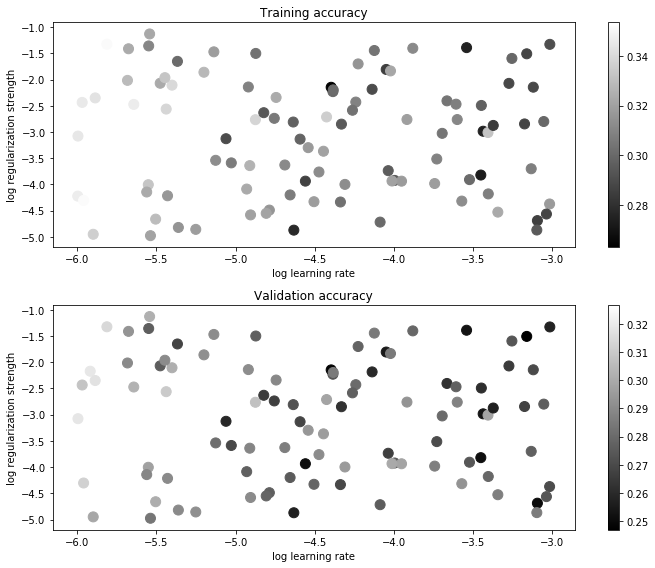

In [21]:
# Visualize the cross-validation results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot training accuracy
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('Training accuracy')

# plot validation accuracy
colors = [results[x][1] for x in results] # default size of markers is 20
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c=colors)
plt.colorbar()
plt.xlabel('log learning rate')
plt.ylabel('log regularization strength')
plt.title('Validation accuracy')

plt.tight_layout()
plt.show()

In [22]:
# Evaluate the best svm on public test set
y_pub_test_pred = best_svm.predict(X_pub_test)
test_pub_accuracy = np.mean(y_pub_test == y_pub_test_pred)
print('linear SVM on raw pixels public test set accuracy: %f' % test_pub_accuracy)

# Evaluate the best svm on private test set
y_pri_test_pred = best_svm.predict(X_pri_test)
test_pri_accuracy = np.mean(y_pri_test == y_pri_test_pred)
print('linear SVM on raw pixels private test set accuracy: %f' % test_pri_accuracy)

linear SVM on raw pixels public test set accuracy: 0.333000
linear SVM on raw pixels private test set accuracy: 0.308000


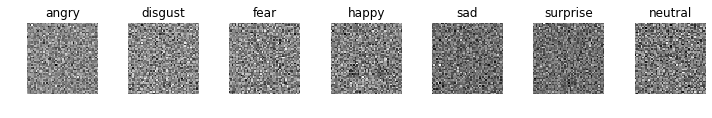

In [23]:
# Visualize the learned weights for each class.
# Depending on your choice of learning rate and regularization strength, these may
# or may not be nice to look at.
w = best_svm.W[:-1,:] # strip out the bias
w = w.reshape(48, 48, 7)
w_min, w_max = np.min(w), np.max(w)
classes = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
for i in range(7):
    plt.subplot(1, 7, i + 1)     
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])
plt.tight_layout()